
### EDA Student Performance Indicator

#### 1. Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2. Dataset Information

gender : sex of students → (Male/Female)

race/ethnicity : ethnicity of students → (Group A, B, C, D, E)

parental level of education : parents' final education → (bachelor's degree, some college, master's degree, associate's degree, high school)

lunch : having lunch before test → (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("StudentsPerformance.csv")

In [14]:
df.shape

(1000, 8)

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### check missing values
#### insights or observation 
there is no missing value
 

In [16]:
## check missing value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### check duplicate value

In [17]:
df.duplicated().sum()

np.int64(0)

there are no duplicate value

In [18]:

# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### check number of unique value in each feature (columns)


In [19]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### here checke in categorical feature unique value

In [20]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [21]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [22]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [23]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [24]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

#### statistics of data

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Client is intrested in showning insights and observation 

#### insights and observation
- from above description of numerical data , all means are very close to each other between 66 and 69
- all standard deviation also close to 14.6 - 15.9 
- while minimum is 0 for maths, and other are having 17 and 10.

In [26]:
# categories of feature 
[feature for feature in df.columns if df[feature].dtype !='O']

['math score', 'reading score', 'writing score']

In [27]:
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

In [28]:
numerical_features,categorical_features

(['math score', 'reading score', 'writing score'],
 ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'])

In [29]:
## Aggregrate the total score with mean
df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average']=df['total_score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### above is basic for all data set
## Explore more visualization

<Axes: xlabel='average', ylabel='Count'>

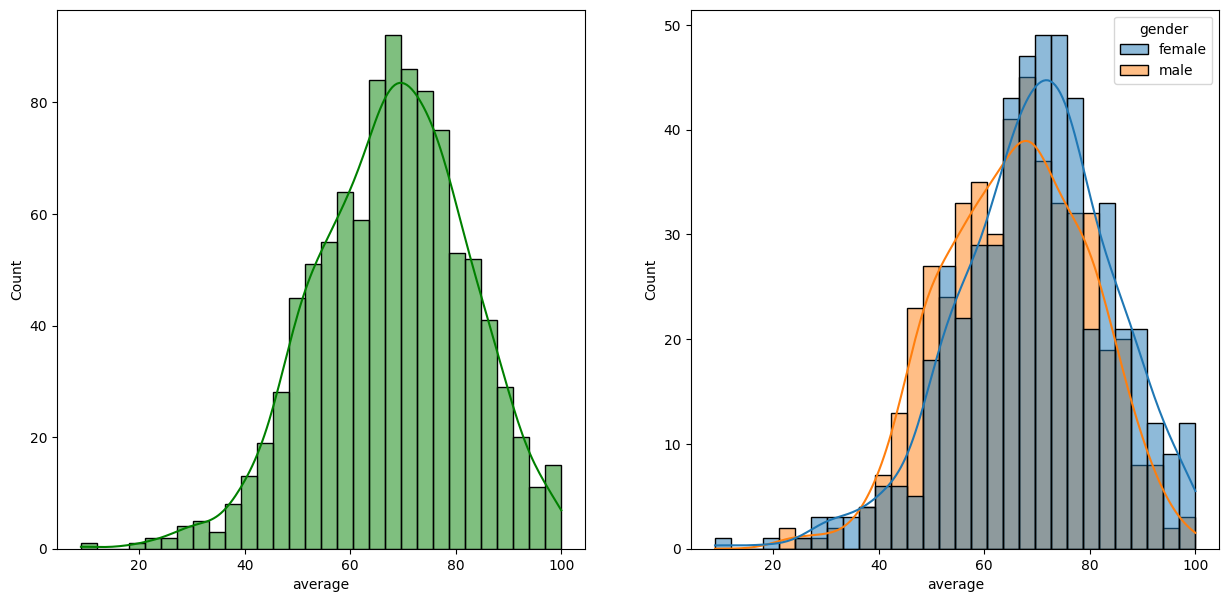

In [30]:
fig,axis=plt.subplots(1,2,figsize=(15,7)) # here subplot use for create two graph image on one screen side by side used
plt.subplot(121) # this statment use for create 1 graph out of 2 .(last 1 is used position of graph)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122) ## here another 1 out of 2
sns.histplot(data=df,x='average',hue='gender',kde=True,bins=30)


### Insights 
- Female student tend to perform well than male student

<Axes: xlabel='average', ylabel='Count'>

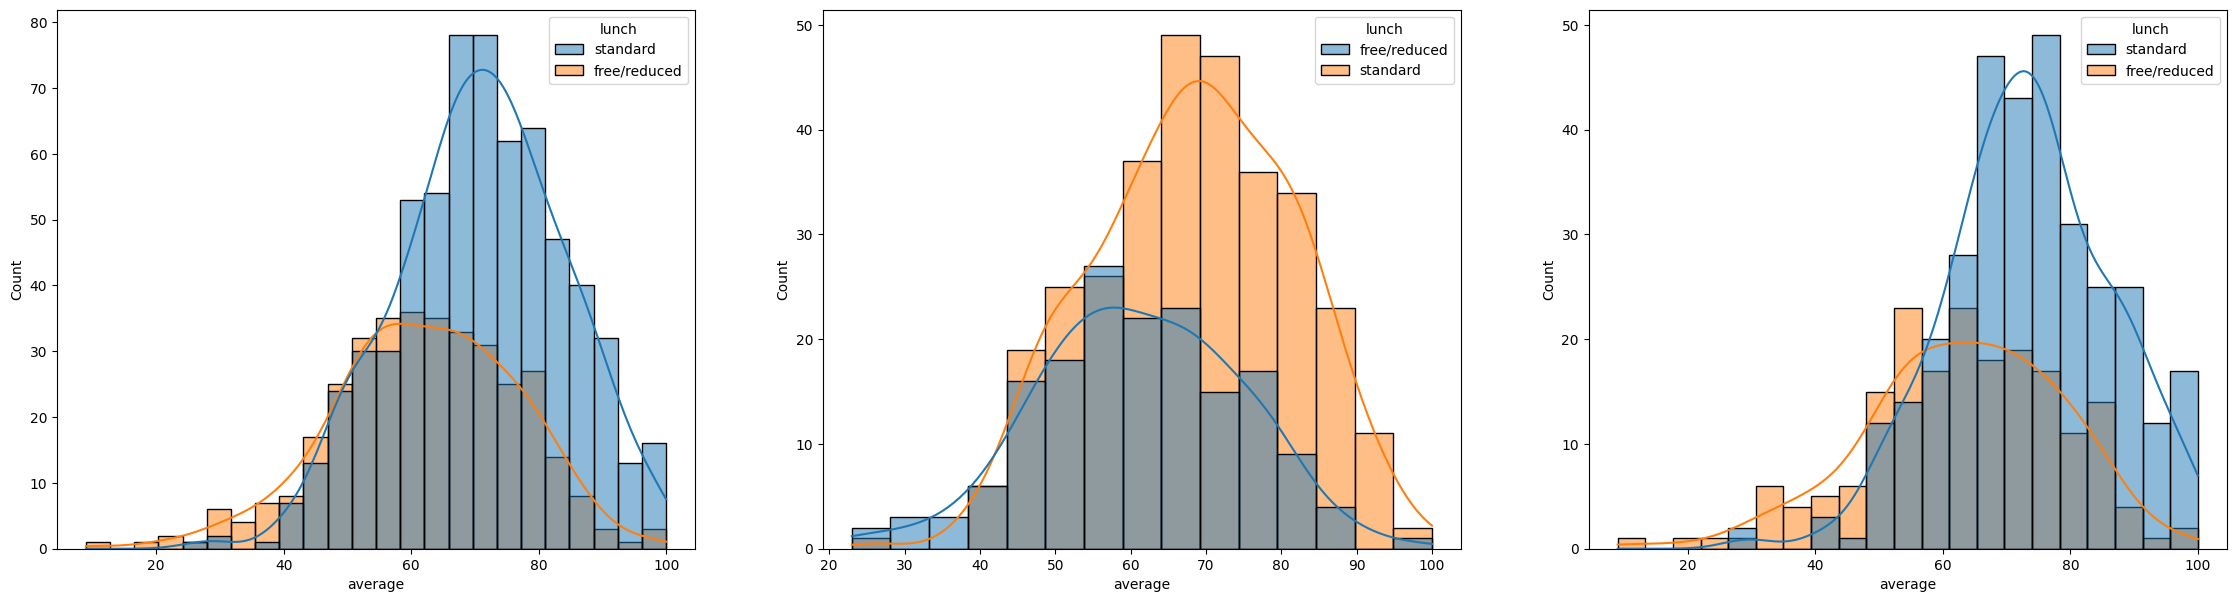

In [31]:
fig,axis=plt.subplots(1,3,figsize=(28,7))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='lunch',color='g',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='lunch',kde=True)

### Insights
- Standard lunch help students perform well in exams
- Standard lunch helps perform well in exams be it male or female students 

In [32]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='average', ylabel='Count'>

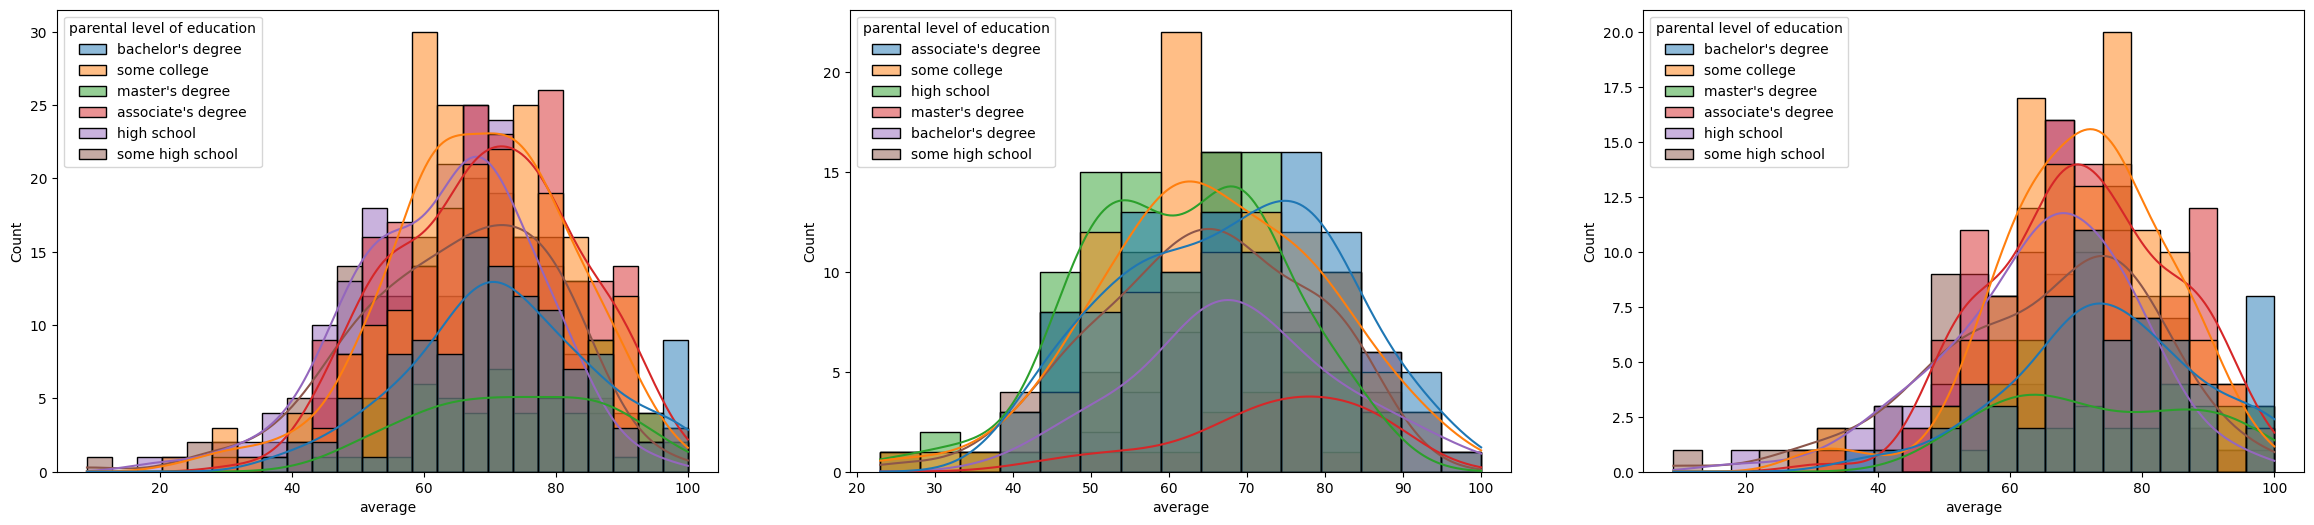

In [33]:
fig,axis=plt.subplots(1,3,figsize=(29,6))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='parental level of education',color='g',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='parental level of education',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='parental level of education',kde=True)


### Insights 
- In general parent's education don't help student perform well in exam
- In 2nd plot show that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- In 3rd  plot we can see that there is no effect of parent's education on female student.

<Axes: xlabel='average', ylabel='Count'>

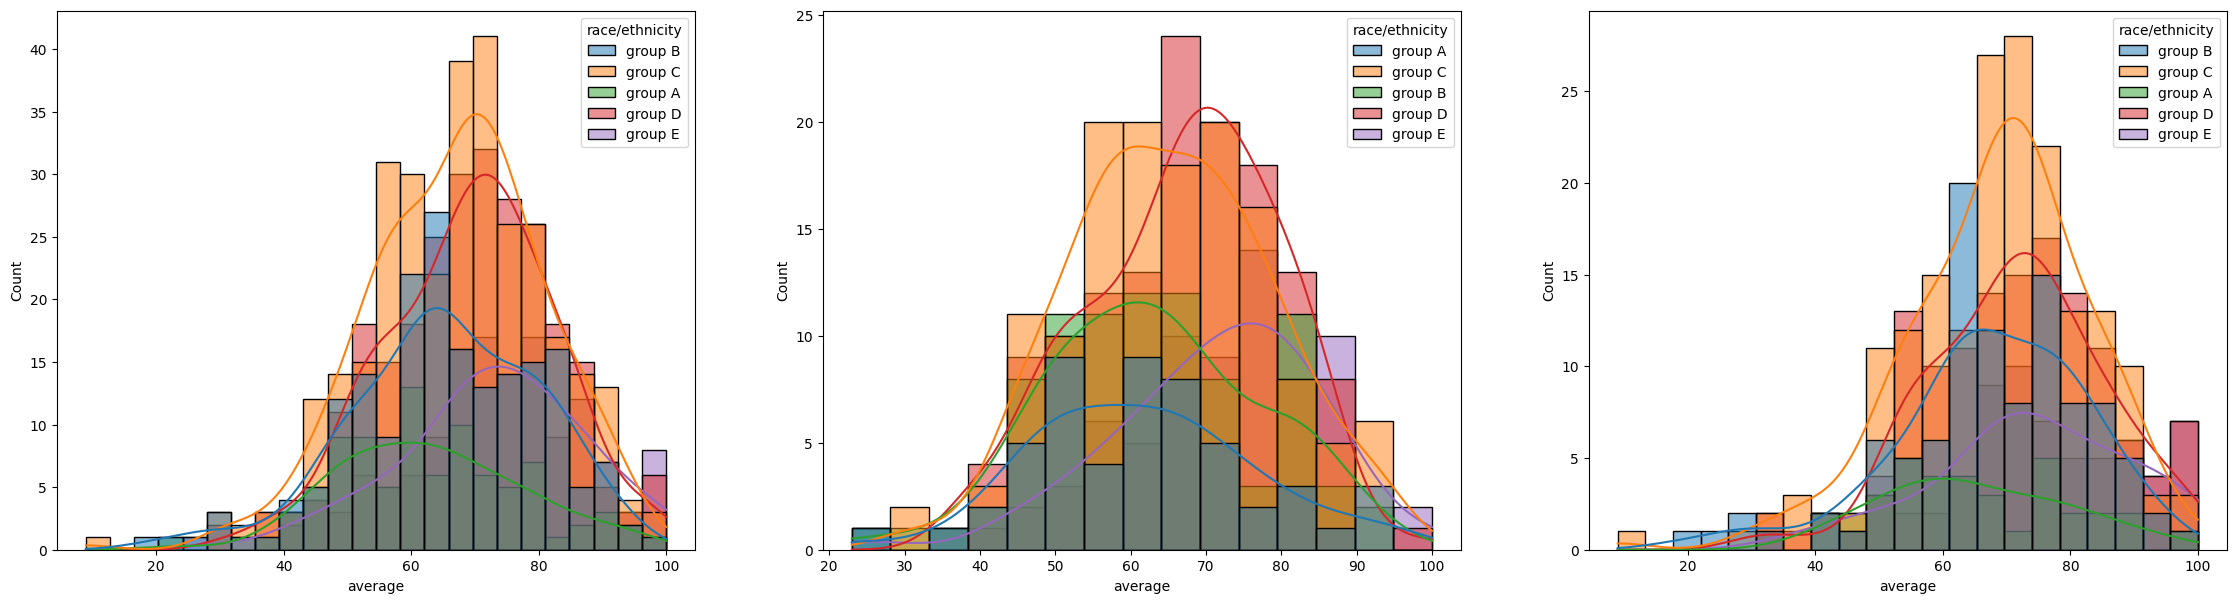

In [34]:
fig,axis=plt.subplots(1,3,figsize=(28,7))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='race/ethnicity',color='g',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='race/ethnicity',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='race/ethnicity',kde=True)

### Insights 
- Student of group A and B tends to perform poorly  in exam.
- Student of group A and B tends to perform poorly  in exam irrespective of whether they are male or female student.

#### for numerical feature used below graph visualization


<Axes: >

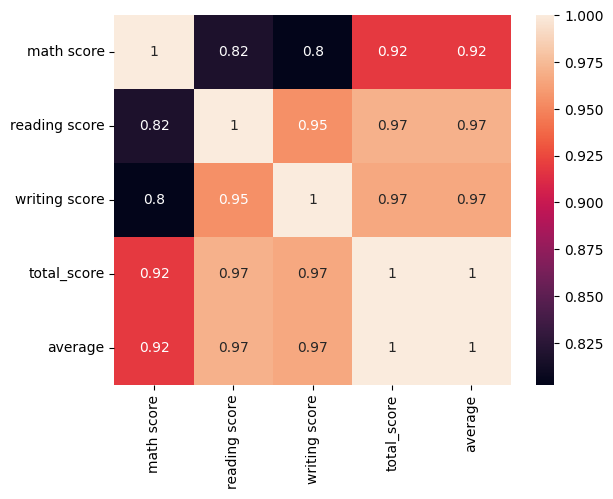

In [35]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

### Insights
by showing the heatmap we can say that : student reading score and writing score is highly related so that their total score and averagescore is high